<a href="https://colab.research.google.com/github/IronStark007/Data-Analyst-Portfolio/blob/master/Performing%20Analysis%20of%20Meteorological%20Data/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

So, We have started the project on Weather dataset. The dataset has hourly temperature recorded for last 10 years starting from 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200. It corresponds to Finland, a country in the Northern Europe. (Source URL: https://www.kaggle.com/muthuj7/weather-dataset)<a href="https://www.kaggle.com/muthuj7/weather-dataset" target="_blank"></a>

Our goal in this Project is to transform the raw data into information and then convert it into knowledge.

In this Project, we would be responsible for perform data cleaning, perform analysis for testing the (given) Hypothesis.

The Null Hypothesis Ho is **"Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".**

The Ho means we need to find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for the same period have increased or not. This monthly analysis has to be done for all 12 months over the 10 year period. So we are basically resampling your data from hourly to monthly, then comparing the same month over the 10 year period. Finally, Support our analysis by appropriate visualizations using matplotlib and seaborn library.
So, lets start with our project.

# Data Cleaning 

First, of all we are going to import the necessary libraries for data cleaning as well as data visualizations

In [ ]:
# importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing all libraries, it is an optional steps to do i.e. to import warnings to ignore all the unnecessary warnings so as to make our script looks nice.

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

Then, we will download our dataset from the Kaggle.com (link is given in introduction) into our local system and save it in the same directory in which our project is, just for our convenience
And see how our dataset looks by head function.

In [ ]:
# read the csv file from pandas
df_weather=pd.read_csv('weatherHistory.csv')

# taking a glance of our data
df_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Check the shape of data by shape function

In [ ]:
# checking the shape of data
df_weather.shape

(96453, 12)

Doing Statistical Analysis by describe function

In [ ]:
# doing statistical analysis-'all' for non-numeric values 
df_weather.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 08:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


Checking if there is any null value by df.isnull() function the doing the sum for a table like format 

In [ ]:
# looking for the null value in our data
df_weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Checking the types of columns in dataset by dtypes function

In [ ]:
# checking the types of each columns
df_weather.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Changing the FORMATTED DATE columns to datetime format for further analysis

In [ ]:
# converting 'Formatted Date' to datetime type
df_weather['Formatted Date']=pd.to_datetime(df_weather['Formatted Date'],utc=True)
df_weather['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

Since we have to look for only Apparent temperature and humidity, dropping all the other columns

In [ ]:
df_weather.drop(columns=['Summary', 'Precip Type', 'Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],axis=1,inplace=True)

Converting 'Formatted Date' to separate month and year columns and taking a look at converted dataset

In [ ]:
df_weather['month']=df_weather['Formatted Date'].dt.month
df_weather['year']=df_weather['Formatted Date'].dt.year

df_weather.head()

,Formatted Date,Apparent Temperature (C),Humidity,month,year
0,2006-03-31 22:00:00+00:00,7.388889,0.89,3,2006
1,2006-03-31 23:00:00+00:00,7.227778,0.86,3,2006
2,2006-04-01 00:00:00+00:00,9.377778,0.89,4,2006
3,2006-04-01 01:00:00+00:00,5.944444,0.83,4,2006
4,2006-04-01 02:00:00+00:00,6.977778,0.83,4,2006


Setting the month column as an index(for grouping purpose)

In [ ]:
df_weather.drop(columns='Formatted Date',axis=1,inplace=True)
df_weather.set_index('month',inplace=True)

Looking at the data after changing index

In [ ]:
df_weather.head()

,Apparent Temperature (C),Humidity,year
month,,,
3,7.388889,0.89,2006
3,7.227778,0.86,2006
4,9.377778,0.89,2006
4,5.944444,0.83,2006
4,6.977778,0.83,2006


Grouping the month and year columns, since we need to compare the same month over the 10 year period and taking a look after at the new dataset after grouping

In [ ]:
df_group=df_weather.groupby(['month','year']).mean()

df_group.head(20)

Apparent Temperature (C)  Humidity
month year                                    
1     2006                 -4.173708  0.834610
      2007                  2.387015  0.813495
      2008                 -2.069907  0.819476
      2009                 -3.669937  0.867621
      2010                 -4.329062  0.875914
      2011                 -2.186813  0.922030
      2012                 -1.965211  0.797581
      2013                 -1.768578  0.883105
      2014                  0.234536  0.846169
      2015                 -0.770124  0.831519
      2016                 -3.014576  0.866156
2     2006                 -2.990716  0.843467
      2007                  2.639848  0.815015
      2008                  1.915597  0.682615
      2009                 -1.641237  0.821161
      2010                 -1.662045  0.851682
      2011                 -2.849471  0.854137
      2012                 -8.817241  0.762859
      2013                  0.418171  0.869345
      2014                  2.742998  0.812530

Checking the shape of dataframe after grouping

In [ ]:
df_group.shape

(133, 2)

Making a columns object for further analysis

In [ ]:
columns=['Apparent Temperature (C)', 'Humidity']

Creating or dividing the dataset into 12 months from year 2006-2016

In [ ]:
df_Jan=df_group.loc[1]
df_Feb=df_group.loc[2]
df_March=df_group.loc[3]
df_April=df_group.loc[4]
df_May=df_group.loc[5]
df_June=df_group.loc[6]
df_July=df_group.loc[7]
df_Aug=df_group.loc[8]
df_Sept=df_group.loc[9]
df_Oct=df_group.loc[10]
df_Nov=df_group.loc[11]
df_Dec=df_group.loc[12]

Now, its time to visualize the data.

# Data Visualization

It is a very important steps in the world of data science to make data speaks by creating various graphs which gives in-depth information of our datasets 


**1)** We will create the Distribution plot for Apparent temperature and Humidity separately to look how the data is distributed for each months over the 10 years from 2006-2016

*For Apparent Temperature-*

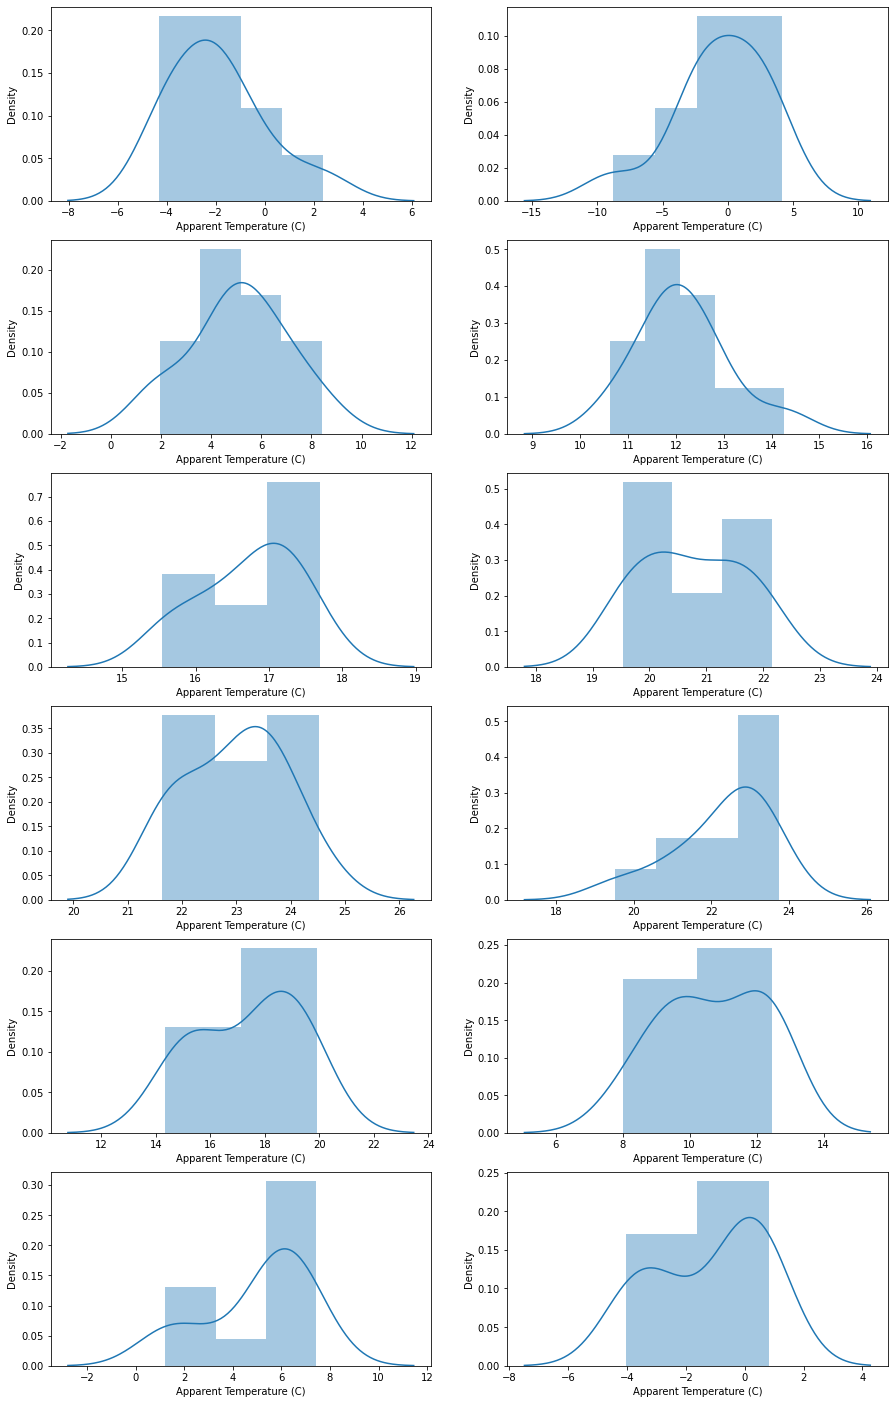

In [ ]:
# Creating Distribution plot for Apparent Temperature (C) of 12 months from years 2006-2016

#1) Creating the axis for 6*12=12 plots
fig=plt.figure(figsize=(15,25))
ax0=plt.subplot(6,2,1)
ax1=plt.subplot(6,2,2)
ax2=plt.subplot(6,2,3)
ax3=plt.subplot(6,2,4)
ax4=plt.subplot(6,2,5)
ax5=plt.subplot(6,2,6)
ax6=plt.subplot(6,2,7)
ax7=plt.subplot(6,2,8)
ax8=plt.subplot(6,2,9)
ax9=plt.subplot(6,2,10)
ax10=plt.subplot(6,2,11)
ax11=plt.subplot(6,2,12)

#2) Creating the distribution plot for apparent temperature
sns.distplot(df_Jan['Apparent Temperature (C)'],ax=ax0);
sns.distplot(df_Feb['Apparent Temperature (C)'],ax=ax1);
sns.distplot(df_March['Apparent Temperature (C)'],ax=ax2);
sns.distplot(df_April['Apparent Temperature (C)'],ax=ax3);
sns.distplot(df_May['Apparent Temperature (C)'],ax=ax4);
sns.distplot(df_June['Apparent Temperature (C)'],ax=ax5);
sns.distplot(df_July['Apparent Temperature (C)'],ax=ax6);
sns.distplot(df_Aug['Apparent Temperature (C)'],ax=ax7);
sns.distplot(df_Sept['Apparent Temperature (C)'],ax=ax8);
sns.distplot(df_Oct['Apparent Temperature (C)'],ax=ax9);
sns.distplot(df_Nov['Apparent Temperature (C)'],ax=ax10);
sns.distplot(df_Dec['Apparent Temperature (C)'],ax=ax11);

#3) Saving and showing the graph
plt.savefig('plot0.png', dpi=300, bbox_inches='tight');
plt.show();

**Insights-**
1. The graphs tells about that there is huge variation in the apparent temperature for all the 12 months  in 10 years.
2. So the Null Hypothesis of Apparent Temperature (C) is increased which can affect the global warming.

*For Humidity-*

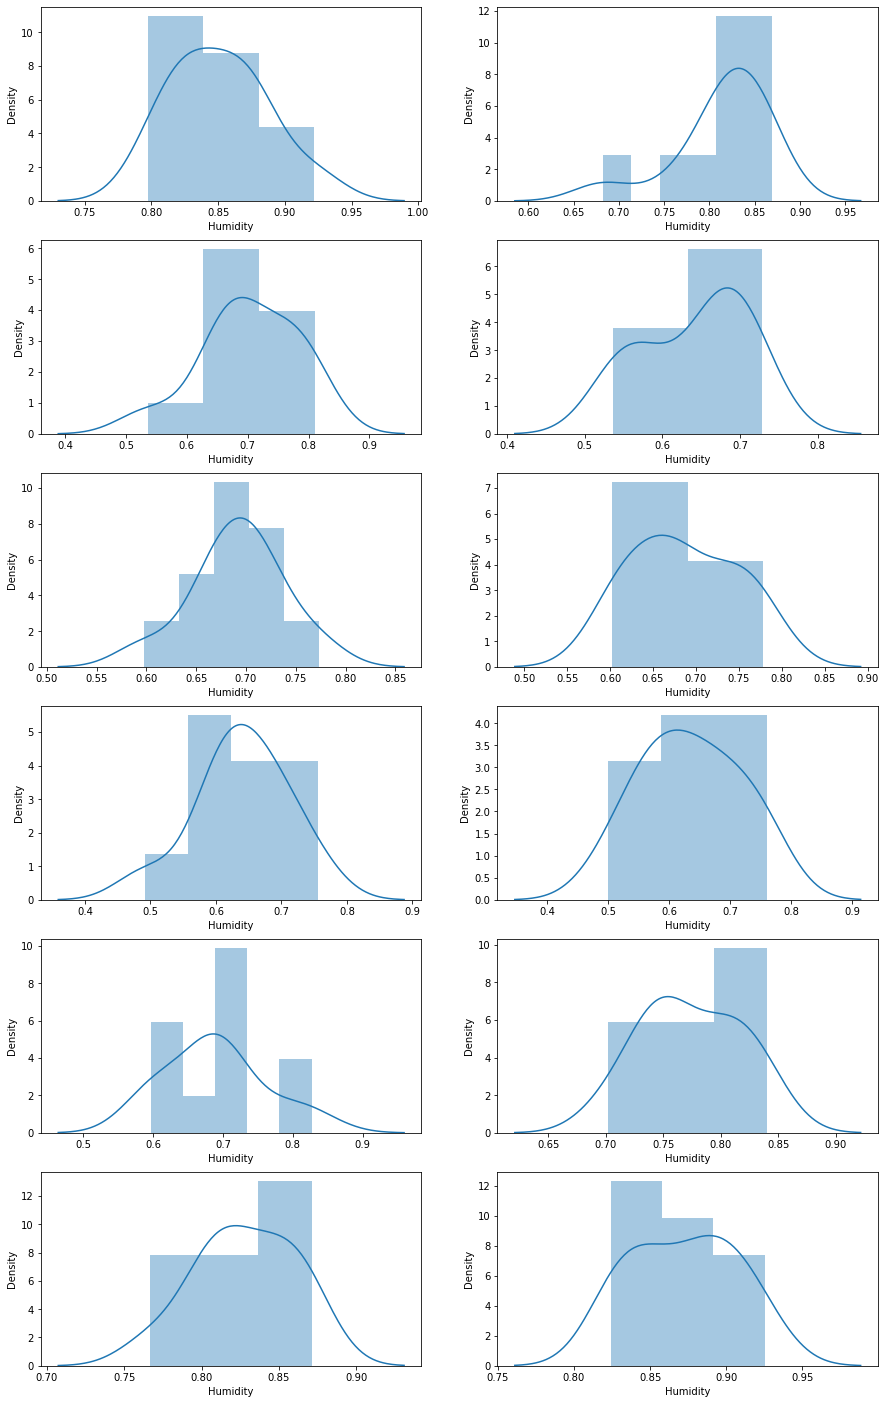

In [ ]:
# Creating Distribution plot for Humidity of 12 months from years 2006-2016

#1) Creating the axis for 6*12=12 plots
fig=plt.figure(figsize=(15,25))
ax0=plt.subplot(6,2,1)
ax1=plt.subplot(6,2,2)
ax2=plt.subplot(6,2,3)
ax3=plt.subplot(6,2,4)
ax4=plt.subplot(6,2,5)
ax5=plt.subplot(6,2,6)
ax6=plt.subplot(6,2,7)
ax7=plt.subplot(6,2,8)
ax8=plt.subplot(6,2,9)
ax9=plt.subplot(6,2,10)
ax10=plt.subplot(6,2,11)
ax11=plt.subplot(6,2,12)

#2) Creating the distribution plot for humidity
sns.distplot(df_Jan['Humidity'],ax=ax0);
sns.distplot(df_Feb['Humidity'],ax=ax1);
sns.distplot(df_March['Humidity'],ax=ax2);
sns.distplot(df_April['Humidity'],ax=ax3);
sns.distplot(df_May['Humidity'],ax=ax4);
sns.distplot(df_June['Humidity'],ax=ax5);
sns.distplot(df_July['Humidity'],ax=ax6);
sns.distplot(df_Aug['Humidity'],ax=ax7);
sns.distplot(df_Sept['Humidity'],ax=ax8);
sns.distplot(df_Oct['Humidity'],ax=ax9);
sns.distplot(df_Nov['Humidity'],ax=ax10);
sns.distplot(df_Dec['Humidity'],ax=ax11);

#3) Saving and showing the graph
plt.savefig('plot1.png', dpi=300, bbox_inches='tight');
plt.show();

**Insights-**
1. The graphs tells about that there is very negligible variation in the humidity for all the 12 months  in 10 years.
2. So the Null Hypothesis of Humidity is somewhat remains constant which can affect the global warming.

**2)** We will create the Line plot for Apparent temperature and Humidity to look how the data is distributed for each months over the 10 years from 2006-2016


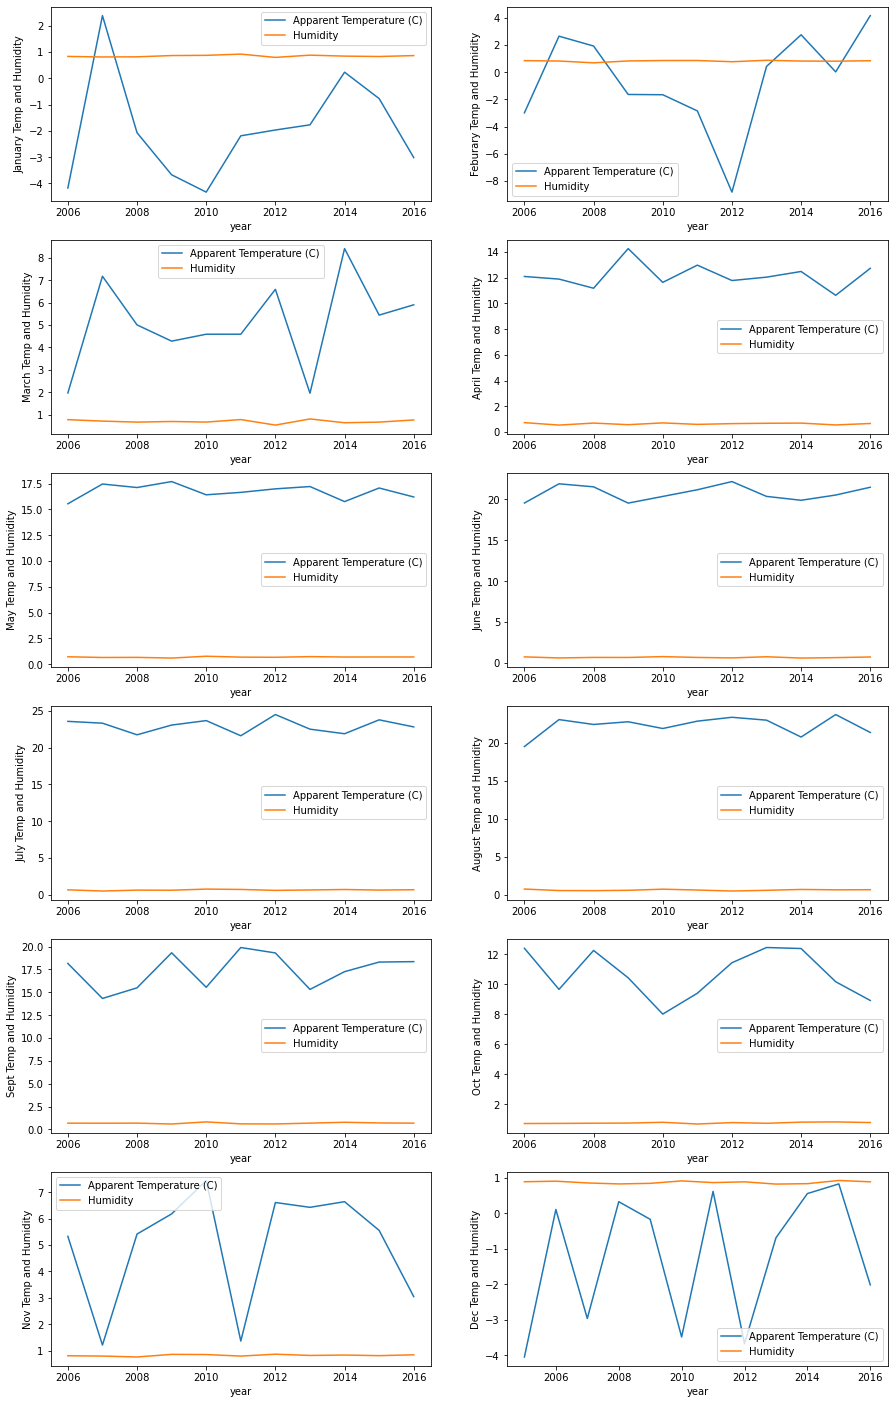

In [ ]:
# Creating Line graph for 12 months from years 2006-2016

#1) Creating the axis for 6*12=12 plots
fig = plt.figure(figsize=(15, 25))
ax0 = plt.subplot(6, 2, 1)
ax1 = plt.subplot(6, 2, 2)
ax2 = plt.subplot(6, 2, 3)
ax3 = plt.subplot(6, 2, 4)
ax4 = plt.subplot(6, 2, 5)
ax5 = plt.subplot(6, 2, 6)
ax6 = plt.subplot(6, 2, 7)
ax7 = plt.subplot(6, 2, 8)
ax8 = plt.subplot(6, 2, 9)
ax9 = plt.subplot(6, 2, 10)
ax10 = plt.subplot(6, 2, 11)
ax11 = plt.subplot(6, 2, 12)

#2) Creating the line plot
df_Jan.plot(kind='line', ax=ax0)
df_Feb.plot(kind='line', ax=ax1)
df_March.plot(kind='line', ax=ax2)
df_April.plot(kind='line', ax=ax3)
df_May.plot(kind='line', ax=ax4)
df_June.plot(kind='line', ax=ax5)
df_July.plot(kind='line', ax=ax6)
df_Aug.plot(kind='line', ax=ax7)
df_Sept.plot(kind='line', ax=ax8)
df_Oct.plot(kind='line', ax=ax9)
df_Nov.plot(kind='line', ax=ax10)
df_Dec.plot(kind='line', ax=ax11)

#3) Fitting legends in some plot to make visualization better
ax10.legend(loc='upper left')
ax11.legend(loc='lower right')

#4) Setting the labels name
ax0.set_ylabel('January Temp and Humidity')
ax1.set_ylabel('Feburary Temp and Humidity')
ax2.set_ylabel('March Temp and Humidity')
ax3.set_ylabel('April Temp and Humidity')
ax4.set_ylabel('May Temp and Humidity')
ax5.set_ylabel('June Temp and Humidity')
ax6.set_ylabel('July Temp and Humidity')
ax7.set_ylabel('August Temp and Humidity')
ax8.set_ylabel('Sept Temp and Humidity')
ax9.set_ylabel('Oct Temp and Humidity')
ax10.set_ylabel('Nov Temp and Humidity')
ax11.set_ylabel('Dec Temp and Humidity')

#5) Saving and showing the graph
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

Insights-
1. The line graphs also tells about that there is very negligible variation (almost constant) in the humidity for all the 12 months  in 10 years.
2. So the Hypothesis of Humidity is somewhat remains constant which can affect the global warming.
3. Whereas for the temperature there is an wave like increase-decrease graph for all the 12 months over 10 years, So the temperature has a greater impact due to Global warming.

**3)** We will create the Area plot which is like 3d plot of line graph for further insights of Apparent temperature v/s Humidity to look how the data is distributed for each months over the 10 years from 2006-2016.

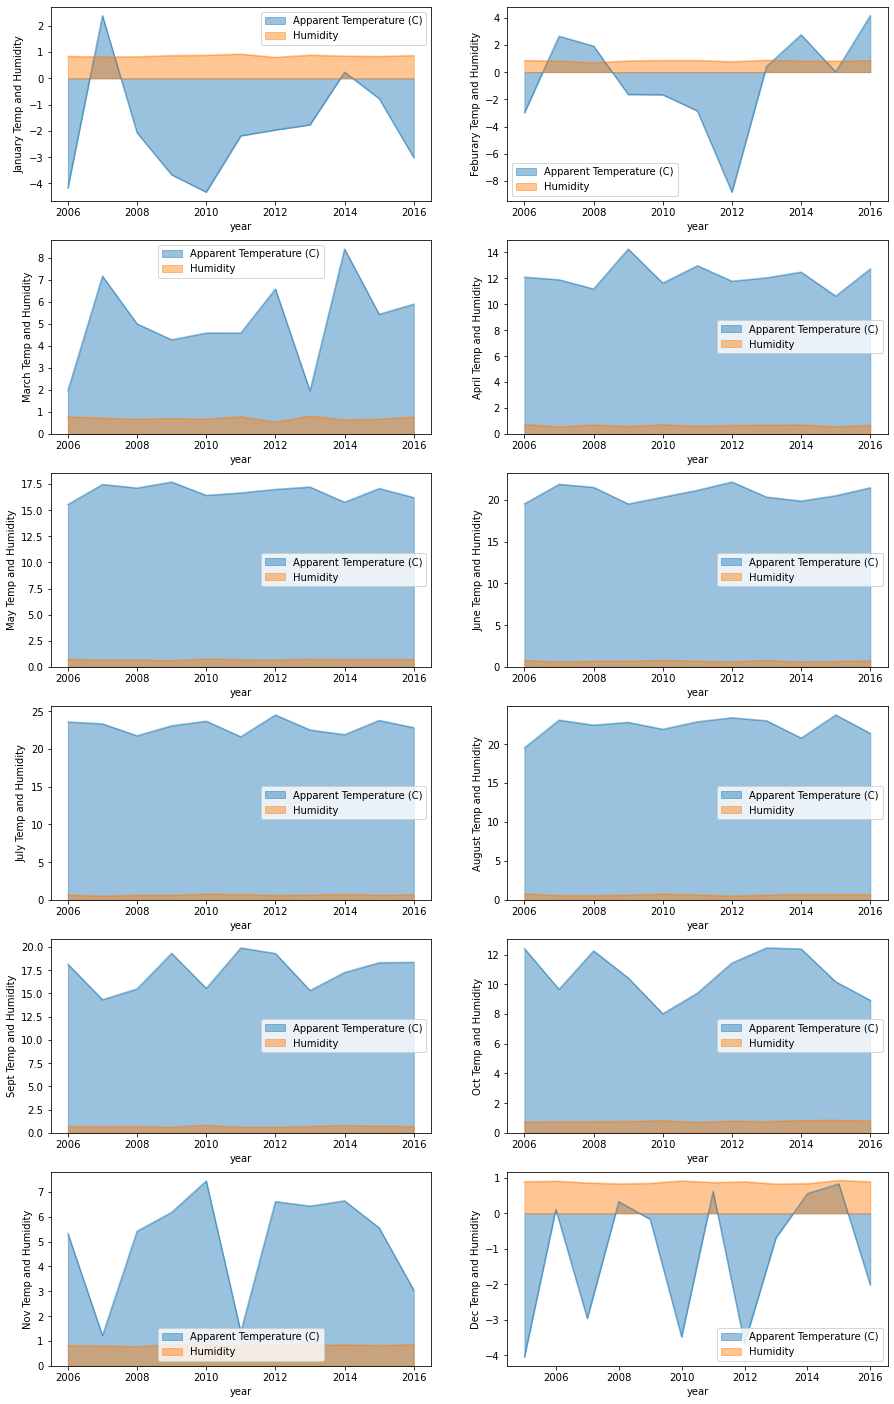

In [ ]:
# Creating Area graph for 12 months from years 2006-2016
#1) Creating the axis for 6*12=12 plots
fig=plt.figure(figsize=(15,25))
ax0=plt.subplot(6,2,1)
ax1=plt.subplot(6,2,2)
ax2=plt.subplot(6,2,3)
ax3=plt.subplot(6,2,4)
ax4=plt.subplot(6,2,5)
ax5=plt.subplot(6,2,6)
ax6=plt.subplot(6,2,7)
ax7=plt.subplot(6,2,8)
ax8=plt.subplot(6,2,9)
ax9=plt.subplot(6,2,10)
ax10=plt.subplot(6,2,11)
ax11=plt.subplot(6,2,12)

#2) Creating the area plot
df_Jan.plot(kind='area',ax=ax0,stacked=False,alpha=0.45)
df_Feb.plot(kind='area',ax=ax1,stacked=False,alpha=0.45)
df_March.plot(kind='area',ax=ax2,stacked=False,alpha=0.45)
df_April.plot(kind='area',ax=ax3,stacked=False,alpha=0.45)
df_May.plot(kind='area',ax=ax4,stacked=False,alpha=0.45)
df_June.plot(kind='area',ax=ax5,stacked=False,alpha=0.45)
df_July.plot(kind='area',ax=ax6,stacked=False,alpha=0.45)
df_Aug.plot(kind='area',ax=ax7,stacked=False,alpha=0.45)
df_Sept.plot(kind='area',ax=ax8,stacked=False,alpha=0.45)
df_Oct.plot(kind='area',ax=ax9,stacked=False,alpha=0.45)
df_Nov.plot(kind='area',ax=ax10,stacked=False,alpha=0.45)
df_Dec.plot(kind='area',ax=ax11,stacked=False,alpha=0.45)

#3) Fitting legends in some plot to make visualization better
ax10.legend(loc='lower center')
ax11.legend(loc='lower right')

#4) Setting the labels name
ax0.set_ylabel('January Temp and Humidity');
ax1.set_ylabel('Feburary Temp and Humidity');
ax2.set_ylabel('March Temp and Humidity');
ax3.set_ylabel('April Temp and Humidity');
ax4.set_ylabel('May Temp and Humidity');
ax5.set_ylabel('June Temp and Humidity');
ax6.set_ylabel('July Temp and Humidity');
ax7.set_ylabel('August Temp and Humidity');
ax8.set_ylabel('Sept Temp and Humidity');
ax9.set_ylabel('Oct Temp and Humidity');
ax10.set_ylabel('Nov Temp and Humidity');
ax11.set_ylabel('Dec Temp and Humidity');

#5) Saving and showing the graph
plt.savefig('plot3.png', dpi=300, bbox_inches='tight');
plt.show();

**Insights-**
1. For the temperature there is an wave like increase-decrease graph for all the 12 months over 10 years, So the temperature has a greater impact due to Global warming
2. The area graphs tells about that there is very negligible variation (almost constant) in the humidity for all the 12 months  in 10 years.
3. So the Hypothesis of Humidity is somewhat remains constant which can affect the global warming.

**4)** Finally, We will create the Bar plot for insights of Apparent temperature v/s Humidity to look how the data is distributed for each months over the 10 years from 2006-2016.

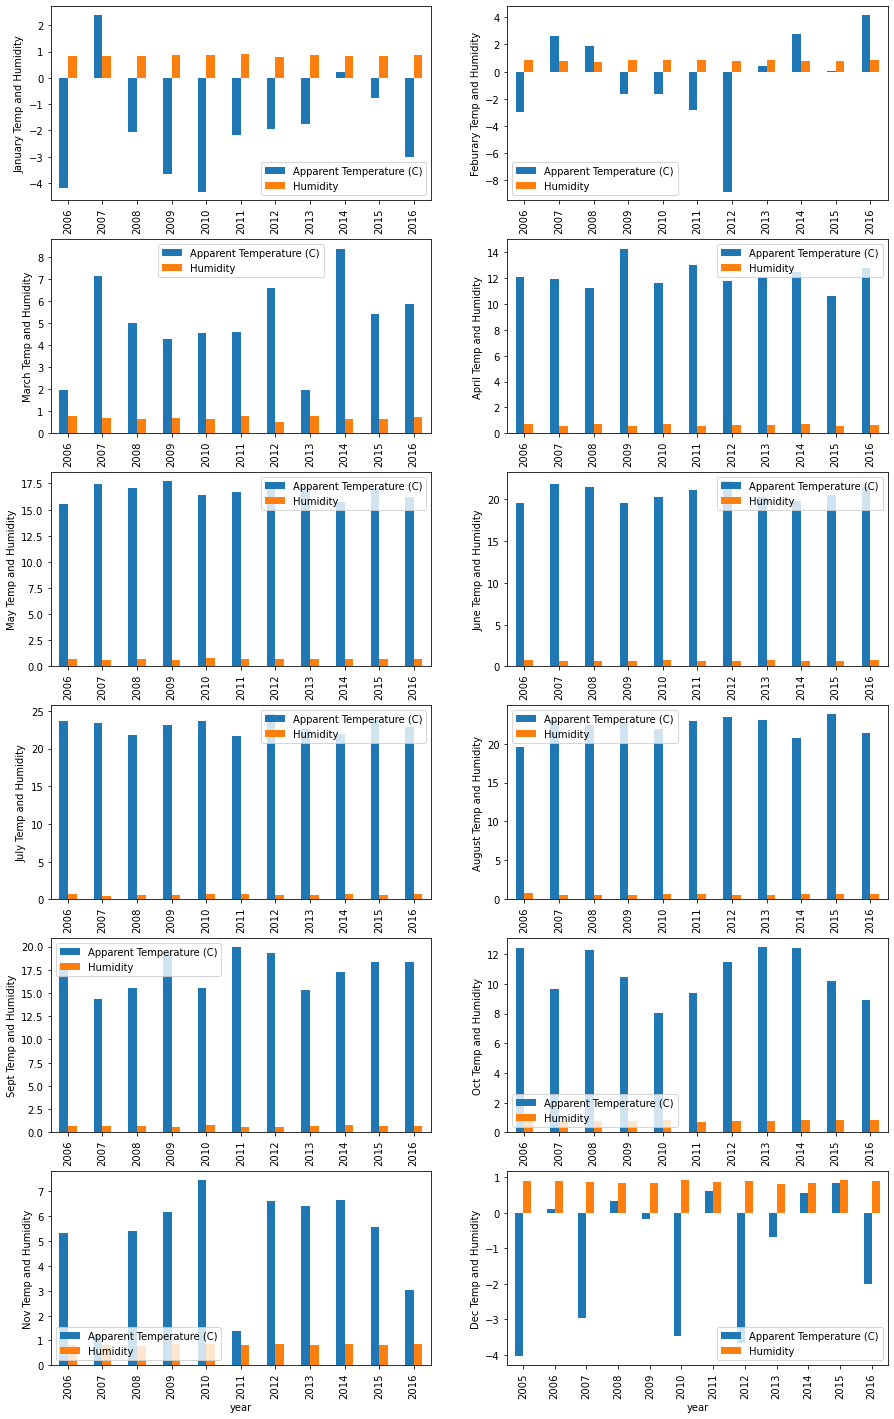

In [ ]:
# Creating Bar graph for 12 months from years 2006-2016

#1) Creating the axis for 6*12=12 plots
fig=plt.figure(figsize=(15,25))
ax0=plt.subplot(6,2,1)
ax1=plt.subplot(6,2,2)
ax2=plt.subplot(6,2,3)
ax3=plt.subplot(6,2,4)
ax4=plt.subplot(6,2,5)
ax5=plt.subplot(6,2,6)
ax6=plt.subplot(6,2,7)
ax7=plt.subplot(6,2,8)
ax8=plt.subplot(6,2,9)
ax9=plt.subplot(6,2,10)
ax10=plt.subplot(6,2,11)
ax11=plt.subplot(6,2,12)

#2) Creating the bar plot
df_Jan.plot(kind='bar',ax=ax0)
df_Feb.plot(kind='bar',ax=ax1)
df_March.plot(kind='bar',ax=ax2)
df_April.plot(kind='bar',ax=ax3)
df_May.plot(kind='bar',ax=ax4)
df_June.plot(kind='bar',ax=ax5)
df_July.plot(kind='bar',ax=ax6)
df_Aug.plot(kind='bar',ax=ax7)
df_Sept.plot(kind='bar',ax=ax8)
df_Oct.plot(kind='bar',ax=ax9)
df_Nov.plot(kind='bar',ax=ax10)
df_Dec.plot(kind='bar',ax=ax11)

#3) Fitting legends in some plot to make visualization better
ax0.legend(loc='lower right')
ax9.legend(loc='lower left')
ax10.legend(loc='lower left')
ax11.legend(loc='lower right')

#4) Setting the labels name
ax0.set_ylabel('January Temp and Humidity');
ax1.set_ylabel('Feburary Temp and Humidity');
ax2.set_ylabel('March Temp and Humidity');
ax3.set_ylabel('April Temp and Humidity');
ax4.set_ylabel('May Temp and Humidity');
ax5.set_ylabel('June Temp and Humidity');
ax6.set_ylabel('July Temp and Humidity');
ax7.set_ylabel('August Temp and Humidity');
ax8.set_ylabel('Sept Temp and Humidity');
ax9.set_ylabel('Oct Temp and Humidity');
ax10.set_ylabel('Nov Temp and Humidity');
ax11.set_ylabel('Dec Temp and Humidity');

#5) Saving and showing the graph
plt.savefig('plot4.png', dpi=300, bbox_inches='tight');
plt.show();

**Insights-**
1. The bar graphs also tells about that there is very negligible variation (almost constant) in the humidity for all the 12 months  in 10 years.
2. So the Hypothesis of Humidity is somewhat remains constant which can affect the global warming.
3. Whereas for the temperature there is an wave like increase-decrease graph for all the 12 months over 10 years, So the temperature has a greater impact due to Global warming.

# CONCLUSION

1. From the all four insights, it is clear that the apparent temperature increased over 10 years i.e. for 2006-2016 for the Finland due to the Global Warming
2. And the humidity is slightly   remains constant over 10 years